# TensorFlow cheat sheet 2
> Some tips for tensorflow and keras

- toc: true 
- badges: true
- comments: true
- categories: [tensorflow]

![](ghtop_images/header2.png)

# Classes

[Classes](https://docs.python.org/3/tutorial/classes.html) 
> Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.
- `init` When a class defines an `__init__()` method, class instantiation automatically invokes `__init__()` for the newly created class instance. 
- `def` Define functions for the class
- `super()` returns a temporary object of the superclass (proxy object) that allows us to acces methods of the base class
- Python classes have an attribute called `__dict__` which gives a Python dictionary containing the object's instance variables and values as key value pairs
- You can also get the dictionary by calling `vars` on an instance of the class
- You can add a new variable to a class object
    - e.g. `my_class_obj.var_new = 2`
    - or `vars(my_class_obj)[var_new2 = 3`


In [199]:
class MyClass:
    def __init__(self):
        self.var1 = 1
my_class_obj = MyClass()

print(f"my_class_obj.__dict__ = {my_class_obj.__dict__}\
      \nvars(my_class_obj) = {vars(my_class_obj)}")
print()

my_class_obj.var2 = 2
vars(my_class_obj)['var3'] = 3

print(vars(my_class_obj))

my_class_obj.__dict__ = {'var1': 1}      
vars(my_class_obj) = {'var1': 1}

{'var1': 1, 'var2': 2, 'var3': 3}


# Model subclassing

In call the format is the same as for the [functional API](https://thomashsimm.com/tensorflow/2022/09/28/Tensorflow.html#Functional-API), where the previous layer is added at the end of the next layer.

Note that `Layer` is given as input to the layers class

`__init__` creates the layers and `call` puts them together for the model

In `__init__` note how unit sizes are added

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate, Layer

class MyModel(Model):
    
    def __init__(self):
        super(MyModel,self).__init__()
        self.Dense_1 = Dense(64,activation='relu')
        self.Dense_2 = Dense(10,activation='relu')
    def call(self,inputs):
        x = self.Dense_1(inputs)
        return self.Dense_2(x)

## Modifications

Say we want to run differently on training and predicting by adding a dropout layer in init then call it if Training = True

`def call(self,inputs,training=True):`

`,    x = self.Dense_1(inputs)`
    
`,    if training:`    

`,         x = self.Dropout_1(x)`

`,    return self.Dense_2(x)`

https://www.tensorflow.org/guide/keras/custom_layers_and_models#best_practice_deferring_weight_creation_until_the_shape_of_the_inputs_is_known

# Custom Layers Class



### Standard dense layer

- self.w are the weights
- self.b are the biases
- both are initialized with values

creates layer as y = w*x + b

Note that `Layer` is given as input to the layers class

In [194]:
# Create a custom layer
from tensorflow.keras.layers import Layer
import tensorflow as tf

class SimpleDense(Layer):
    
    def __init__(self,units=32):
        super(SimpleDense, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
                initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                trainable=True,name='kernel',
                                )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
                initial_value=b_init(shape=(self.units), dtype='float32'),
                trainable=True, name='bias',
                                )
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = SimpleDense(units=32)

x = tf.ones((1,1))

print(dense_layer(x) )
print()
print(f"Weights = {dense_layer.weights[0].numpy()} \n\nand biases {dense_layer.weights[1].numpy()}")


tf.Tensor(
[[-0.00796256  0.05831495 -0.00300906  0.04439464  0.01879046  0.07508276
   0.03777922  0.0735352  -0.02905384 -0.02518708 -0.02423255 -0.02473113
  -0.00455697  0.01294913  0.05680227 -0.01427526  0.04952488 -0.10006206
  -0.01683045  0.02113631 -0.02803414  0.01535907 -0.07223836 -0.01957527
  -0.02640614 -0.07920882 -0.03078735 -0.0072176  -0.09545477  0.04990829
   0.04987451  0.01131598]], shape=(1, 32), dtype=float32)

Weights = [[-0.00796256  0.05831495 -0.00300906  0.04439464  0.01879046  0.07508276
   0.03777922  0.0735352  -0.02905384 -0.02518708 -0.02423255 -0.02473113
  -0.00455697  0.01294913  0.05680227 -0.01427526  0.04952488 -0.10006206
  -0.01683045  0.02113631 -0.02803414  0.01535907 -0.07223836 -0.01957527
  -0.02640614 -0.07920882 -0.03078735 -0.0072176  -0.09545477  0.04990829
   0.04987451  0.01131598]] 

and biases [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Or equivalently...

In [22]:
# Create a custom layer
from tensorflow.keras.layers import Layer
import tensorflow as tf

class MyLayer(Layer):
    
    def __init__(self,units,input_dim):
        super(MyLayer, self).__init__()
        self.w = self.add_weight(shape=(input_dim,units),
                                initializer='random_normal',
                                trainable=True)
        self.b = self.add_weight(shape=(units,),
                                 initializer='zeros',
                                trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = MyLayer(3,5)

x = tf.ones((1,5))

print(dense_layer(x) )
print()
print(f"Weights = {dense_layer.weights[0].numpy()} \n\nand biases {dense_layer.weights[1].numpy()}")



tf.Tensor([[-0.00561558 -0.22868529 -0.02974611]], shape=(1, 3), dtype=float32)

Weights = [[ 0.04089291 -0.06954639 -0.01105437]
 [-0.02098138 -0.06875699 -0.00736261]
 [-0.02153204 -0.14160022 -0.03822825]
 [-0.02502588 -0.01817141  0.03236837]
 [ 0.0210308   0.0693897  -0.00546925]] 

and biases [0. 0. 0.]


### Create a Dropout layer as a custom layer

N.B. uses [`tf.nn`](https://www.tensorflow.org/api_docs/python/tf/nn) primitive Neural Net (NN) Operations.

In [24]:
class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
        
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs, rate=self.rate)

## Create the custom model

Same as above but using the custom layers instead

In [26]:
# Build the model using custom layers with the model subclassing API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

class MyModel(Model):

    def __init__(self, units_1, input_dim_1, units_2, units_3):
        super(MyModel, self).__init__()
        # Define layers
        self.layer_1 = MyLayer(units_1, input_dim_1)  
        self.dropout_1 = MyDropout(0.5)
        self.layer_2 = MyLayer(units_2, units_1)
        self.dropout_2 = MyDropout(0.5)
        self.layer_3 = MyLayer(units_3, units_2)
        self.softmax = Softmax()
        
    def call(self, inputs):
        # Define forward pass
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        
        return self.softmax(x)

In [30]:
# Instantiate a model object

model = MyModel(64,10000,64,46)
print(model(tf.ones((1, 10000))))
print()
model.summary()

tf.Tensor(
[[0.00593624 0.00634939 0.05267304 0.00782295 0.01955794 0.0013299
  0.00763652 0.22506231 0.04023628 0.00110034 0.02134436 0.01490009
  0.00174251 0.01910679 0.05380287 0.00071206 0.0641818  0.00902538
  0.00163135 0.00276065 0.00214337 0.00366833 0.11546794 0.00362498
  0.03105447 0.00112369 0.0003199  0.02285093 0.00455131 0.00351223
  0.01460814 0.03380786 0.01641758 0.05988773 0.05288981 0.00567744
  0.01013041 0.02062218 0.01893481 0.00864016 0.00199537 0.00243362
  0.00046626 0.00392747 0.00084952 0.00348179]], shape=(1, 46), dtype=float32)

Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_28 (MyLayer)        multiple                  640064    
_________________________________________________________________
my_dropout_6 (MyDropout)     multiple                  0         
_________________________________________________________________
my_layer_29 (MyLay

# Create Regression model with Differentiation

The main step is to get the gradient (differentiation) of the loss function, as below

The gradients are then used to 

`with tf.GradientTape() as tape:`

`.        predictions = linear_regression(x_train)`

`.        loss = SquaredError(predictions, y_train)`
    
`gradients = tape.gradient(loss, linear_regression.trainable_variables)`
    
`linear_regression.m.assign_sub(learning_rate * gradients[0])`
    
`linear_regression.b.assign_sub(learning_rate * gradients[1])`

Calculating the loss is the *forward pass* and calculating the gardients is the *backward pass*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

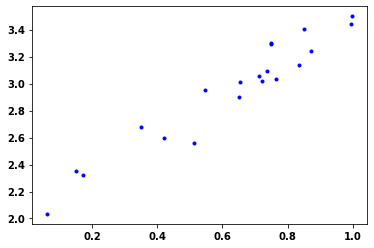

In [10]:
# Create data from a noise contaminated linear model

def MakeNoisyData(m, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = m * x + b + noise
    return x, y

m=1.5
b=2
x_train, y_train = MakeNoisyData(m,b)
plt.plot(x_train, y_train, 'b.')

In [37]:
from tensorflow.keras.layers import Layer

# Build a custom layer for the linear regression model

class LinearLayer(Layer):
    
    def __init__(self):
        super(LinearLayer, self).__init__()
        self.m = self.add_weight(shape=(1,),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(1,),
                                 initializer='zeros')
    
    def call(self,inputs):
        return self.m*inputs + self.b

    
linear_regression = LinearLayer()

In [38]:
# Define the mean squared error loss function

def SquaredError(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true)) 

starting_loss = SquaredError(linear_regression(x_train), y_train)
print("Starting loss", starting_loss.numpy())

Starting loss 8.915239


In [39]:
#collapse-output
# Implement a gradient descent training loop for the linear regression model

learning_rate = 0.05
steps = 25
print("Function y = mx + b\n")
for i in range(steps):
    
    with tf.GradientTape() as tape:
        predictions = linear_regression(x_train)
        loss = SquaredError(predictions, y_train)
    
    gradients = tape.gradient(loss, linear_regression.trainable_variables)
    
    print(f"(m) = {linear_regression.m.numpy()[0]:.2f}\
          (b) = {linear_regression.b.numpy()[0]:.2f}")
    print(f"(dm/dloss) = {gradients[0].numpy()[0]:.2f}\
          (db/dloss) = {gradients[1].numpy()[0]:.2f}")
    
    linear_regression.m.assign_sub(learning_rate * gradients[0])
    linear_regression.b.assign_sub(learning_rate * gradients[1])
    
    print("         Step %d, Loss %f\n" % (i, loss.numpy()))

Function y = mx + b

(m) = -0.02          (b) = 0.00
(dm/dloss) = -3.90          (db/dloss) = -5.92
         Step 0, Loss 8.915239

(m) = 0.17          (b) = 0.30
(dm/dloss) = -3.35          (db/dloss) = -5.08
         Step 1, Loss 6.579444

(m) = 0.34          (b) = 0.55
(dm/dloss) = -2.88          (db/dloss) = -4.36
         Step 2, Loss 4.856421

(m) = 0.49          (b) = 0.77
(dm/dloss) = -2.48          (db/dloss) = -3.75
         Step 3, Loss 3.585418

(m) = 0.61          (b) = 0.96
(dm/dloss) = -2.13          (db/dloss) = -3.22
         Step 4, Loss 2.647849

(m) = 0.72          (b) = 1.12
(dm/dloss) = -1.83          (db/dloss) = -2.76
         Step 5, Loss 1.956242

(m) = 0.81          (b) = 1.25
(dm/dloss) = -1.57          (db/dloss) = -2.37
         Step 6, Loss 1.446071

(m) = 0.89          (b) = 1.37
(dm/dloss) = -1.35          (db/dloss) = -2.04
         Step 7, Loss 1.069737

(m) = 0.95          (b) = 1.48
(dm/dloss) = -1.16          (db/dloss) = -1.75
         Step 8, Los

m:1.5,  trained m:[1.3375876]
b:2,  trained b:[2.0458574]


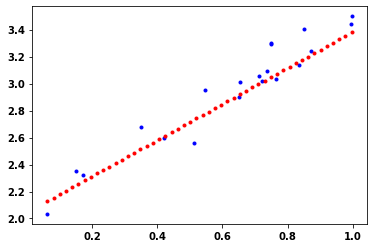

In [40]:
# Plot the learned regression model

print("m:{},  trained m:{}".format(m,linear_regression.m.numpy()))
print("b:{},  trained b:{}".format(b,linear_regression.b.numpy()))

plt.plot(x_train, y_train, 'b.')

x_linear_regression=np.linspace(min(x_train), max(x_train),50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.')

# Multiple layer model

For multiple layers it is the same but we need to iterate over the layers too.

If we put the gradients part within it's own function, putting `@tf.function` before that unction to speed things up.


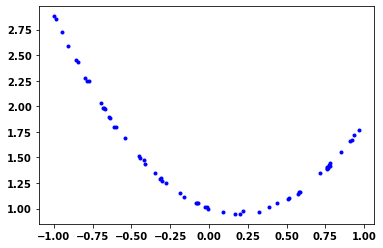

In [136]:
# Create data from a noise contaminated mixed model

def MakeNoisyData2(m, b, n=60):
    x = tf.random.uniform(shape=(n,))*2 -1
    noise = tf.random.normal(shape=(len(x),), stddev=0.01)
    y = m * x**2 -  np.exp(x/2) + b + noise
    return x, y

m=1.5
b=2
x_train, y_train = MakeNoisyData2(m,b)
plt.plot(x_train, y_train, 'b.')


x_train = tf.reshape(x_train,(len(x_train),1))
y_train = tf.reshape(y_train,(len(x_train),1))

In [150]:
# Define the custom layers and model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax
class MyLayer(Layer):
    
    def __init__(self,units):
        super(MyLayer, self).__init__()
        self.units = units     
    def build(self,input_shape):
        self.w = self.add_weight(shape=(input_shape[-1],self.units),
                                initializer='random_normal',
                                trainable=True,
                                name ='kernel')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                trainable=True,
                                name = 'bias')       
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
    
class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs, rate=self.rate)
    
    
class MyModel(Model):

    def __init__(self, units_1, units_2, units_3):
        super(MyModel, self).__init__()
        # Define layers
        self.layer_1 = MyLayer(units_1)  
        self.dropout_1 = MyDropout(0.)
        self.layer_2 = MyLayer(units_2)
        self.dropout_2 = MyDropout(0.)
        self.layer_3 = MyLayer(units_3)
#         self.softmax = Softmax()
        
    def call(self, inputs):
        # Define forward pass
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        
        return x

In [190]:
model = MyModel(10, 10, 1)
model(x_train)
model.summary()


Model: "my_model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_54 (MyLayer)        multiple                  20        
_________________________________________________________________
my_dropout_36 (MyDropout)    multiple                  0         
_________________________________________________________________
my_layer_55 (MyLayer)        multiple                  110       
_________________________________________________________________
my_dropout_37 (MyDropout)    multiple                  0         
_________________________________________________________________
my_layer_56 (MyLayer)        multiple                  11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


#### Define the loss function and optimizer



In [191]:
# Define the categorical cross entropy loss and SGD optimizer

loss_object = tf.keras.losses.MeanAbsoluteError()

def loss(model, x, y, wd):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    wd_penalty = wd * tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    y_ = model(x)
    print(y_)
    return loss_object(y_true=y, y_pred=y_) + wd_penalty

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)



#### Define the function to do forward and backward passes



In [173]:
# Define a function to compute the forward and backward pass
@tf.function
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        # forward pass
        loss_value = loss(model, inputs, targets, wd)
        # backward pass
        grads = tape.gradient(loss_value, model.trainable_variables)
    return loss_value, grads

#### Do the training

In [192]:
# Implement the training loop

from tensorflow.keras.utils import to_categorical
import time

start_time = time.time()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.batch(32)

train_loss_results = []
train_accuracy_results =[]

num_epochs=1200
weight_decay =0.005

for epoch in range(num_epochs):
    
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.MeanAbsoluteError()
    
    # Training loop
    for x, y in train_dataset:
        # Optimise the model
        # do forward and backward pass
        loss_value, grads = grad(model, x, y, weight_decay)
        # update parameters with optimizer
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Compute current loss
        epoch_loss_avg(loss_value)
        # Compile predicted label to actual label
        epoch_accuracy(y, model(x))
        
    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    if epoch%100==0:
        print(f"Epoch {epoch:03d} : Loss {epoch_loss_avg.result():.3f}: MAE {100*epoch_accuracy.result():.2f}")
        
print("Duration :{:.3f}".format(time.time() - start_time))

Tensor("my_model_18/my_layer_56/add:0", shape=(32, 1), dtype=float32)
Tensor("my_model_18/my_layer_56/add:0", shape=(28, 1), dtype=float32)
Epoch 000 : Loss 1.526: MAE 147.14
Epoch 100 : Loss 0.403: MAE 39.83
Epoch 200 : Loss 0.402: MAE 39.76
Epoch 300 : Loss 0.400: MAE 39.52
Epoch 400 : Loss 0.382: MAE 37.52
Epoch 500 : Loss 0.187: MAE 16.35
Epoch 600 : Loss 0.164: MAE 14.40
Epoch 700 : Loss 0.157: MAE 11.87
Epoch 800 : Loss 0.120: MAE 10.77
Epoch 900 : Loss 0.108: MAE 8.77
Epoch 1000 : Loss 0.095: MAE 9.43
Epoch 1100 : Loss 0.107: MAE 6.95
Duration :19.749


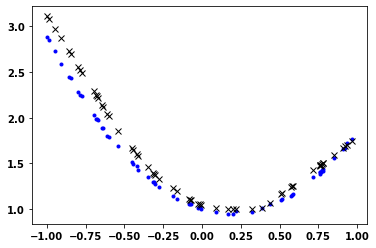

In [193]:
y_pred = model.predict(x_train)
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, y_pred, 'kx')
